 # IRIS FLOWER CLASSIFICATION

The Iris flower dataset is a classic example of a multivariate dataset used for classification tasks. A machine learning model can be trained and evaluated using various algorithms and techniques to accurately classify new samples of Iris flowers based on their attributes, such as sepal length, sepal width, petal length, and petal width.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white",color_codes=True)

In [2]:
iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris=iris.drop(columns=['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

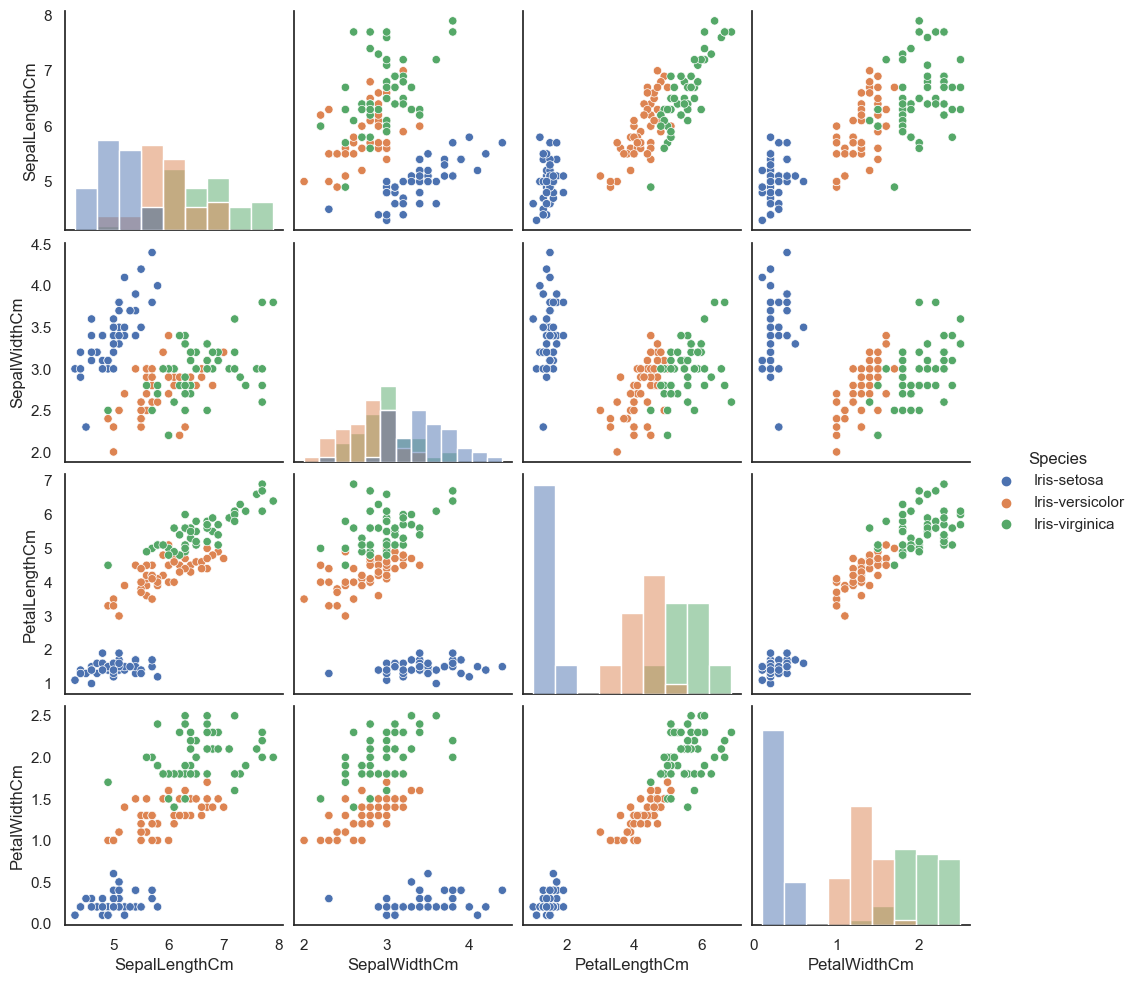

In [21]:
sns.pairplot(iris,hue="Species",diag_kind="hist")    #pairplot with original target variable names

# DATA TRANSFORMATION

Here , our target variable is categorical and since we are using a Logistric Regression model , we now convert the categorical values to numerical values.
We achieve this by mapping

In [7]:
iris   #before transformation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
flower_values={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
iris["Species"]=iris["Species"].map(flower_values)
iris     #after tranformation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# PAIRPLOT from Seaborn

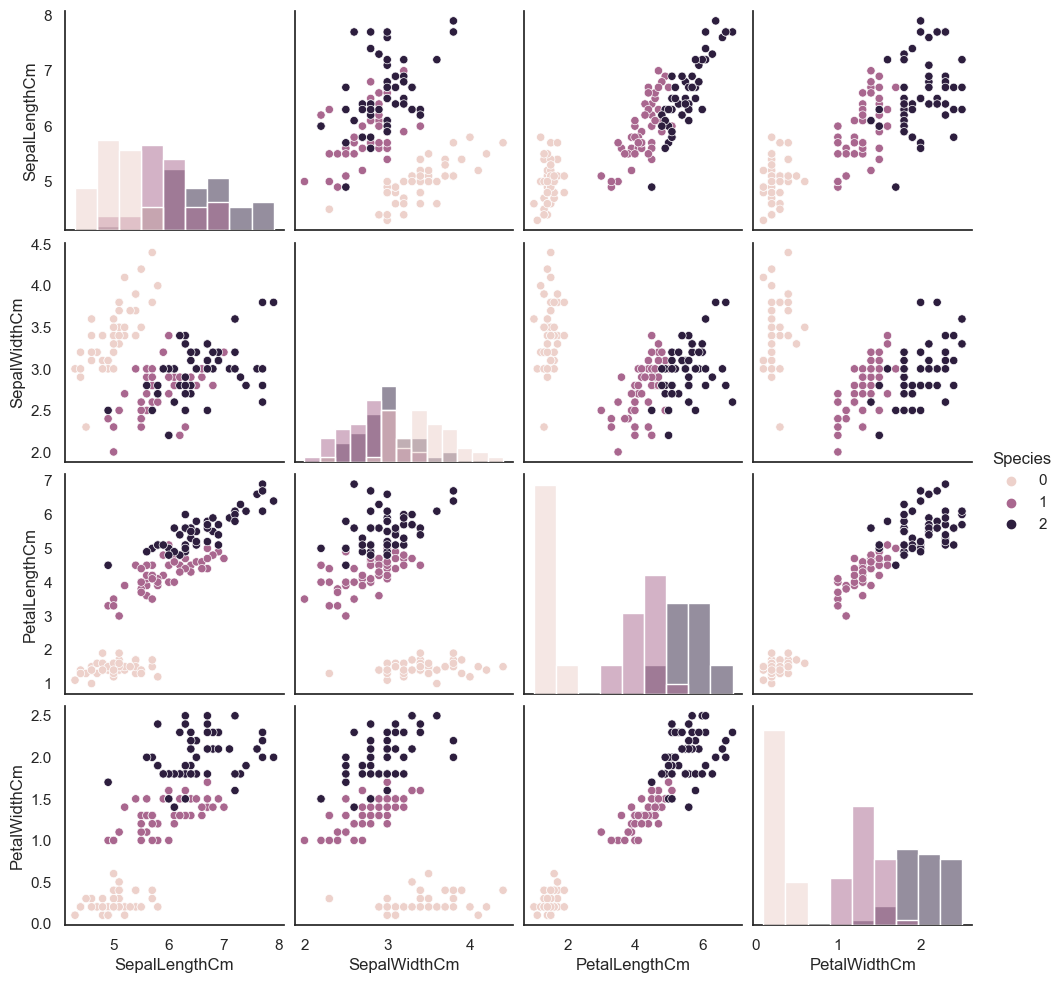

In [9]:
sns.pairplot(iris,hue="Species",diag_kind="hist")   #after transforming

# DATA VISUALISATION :

# HEATMAP - from Seaborn

<AxesSubplot:>

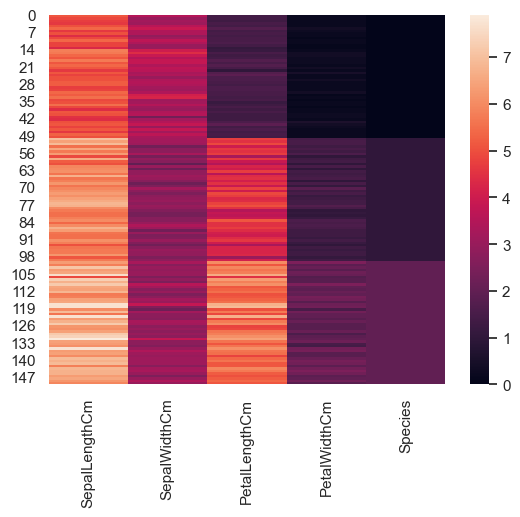

In [10]:
sns.heatmap(iris)

# LOGISTIC REGRESSION MODEL

# DATA SET SPLITTING:

In [16]:
from sklearn.model_selection import train_test_split
x=iris.drop(columns=['Species'])
y=iris['Species']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

# MODEL - FIT :

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression()

In [19]:
model.fit(x_train,y_train)

LogisticRegression()

# MODEL EVALUATION :

In [20]:
model.score(x_test,y_test)

1.0

In [61]:
y_pred=model.predict(x_test)
y_pred

array([2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0,
       1])

In [79]:
from sklearn import metrics


print(metrics.classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# CONCLUSION:

Thus,a classifing model has been created using logistic regression with an ACCURACY of 97% and WEIGHTED-ACCURACY :98%
